In [378]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split

Import libraries

In [379]:
new_data = np.load('nodule_images_updated_3.npy')
new_data_label = np.load('malignancy_scores_updated_3.npy')

Load image data from the numpy arrays

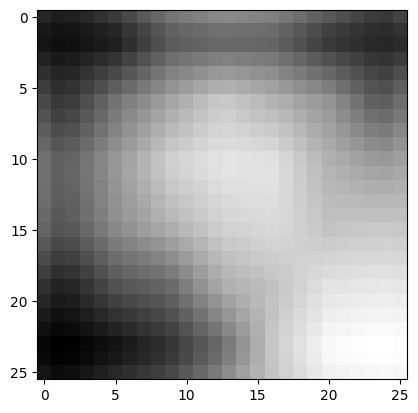

In [380]:
nodule = new_data[2, :, :]
nodule = np.reshape(nodule, (26,26))
from matplotlib import pyplot as plt
plt.imshow(nodule, cmap='gray')
plt.show()

Visualise a nodule by changing the number in the nodule function

In [381]:
new_data = new_data.reshape(new_data.shape[0], 26, 26, 1)
converted_array = np.where(new_data_label == 1, 0, 1)

Reshape the image data so that the colour channel is included in the arrays.
The images are in greyscale so therefore only one colour channel is used. The data labels for the nodules are also updated to be binary.

In [382]:
newTrain, newTest, newLabelTrain, newLabelTest = train_test_split(new_data, converted_array, test_size=0.2)

Split data into training and testing sets

In [383]:
model = Sequential()

model.add(Conv2D(32, (7,7), strides = 2, activation = 'relu', input_shape=(26,26,1))) 
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), strides = 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


Model Building

In [384]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Add optimiser parameter (using Adam optimsier)

In [385]:
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 10, 10, 32)        1600      
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_65 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 1, 1, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_31 (Flatten)        (None, 64)                0         
                                                                 
 dense_62 (Dense)            (None, 32)              

Summary of model that has been built

In [386]:
hist = model.fit(newTrain, newLabelTrain, epochs = 25, validation_data = (newTest,newLabelTest))

Epoch 1/25


88/88 [==============================] - 1s 7ms/step - loss: 0.6303 - accuracy: 0.6376 - val_loss: 0.5902 - val_accuracy: 0.6300
Epoch 2/25
88/88 [==============================] - 0s 5ms/step - loss: 0.5711 - accuracy: 0.6744 - val_loss: 0.5598 - val_accuracy: 0.6829
Epoch 3/25
88/88 [==============================] - 0s 5ms/step - loss: 0.5396 - accuracy: 0.7116 - val_loss: 0.5296 - val_accuracy: 0.7371
Epoch 4/25
88/88 [==============================] - 0s 5ms/step - loss: 0.5102 - accuracy: 0.7352 - val_loss: 0.5143 - val_accuracy: 0.7343
Epoch 5/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7680 - val_loss: 0.4830 - val_accuracy: 0.7900
Epoch 6/25
88/88 [==============================] - 0s 4ms/step - loss: 0.4598 - accuracy: 0.7820 - val_loss: 0.4769 - val_accuracy: 0.7643
Epoch 7/25
88/88 [==============================] - 0s 5ms/step - loss: 0.4331 - accuracy: 0.8045 - val_loss: 0.4407 - val_accuracy: 0.7929
Epoch 8/25
88/88 [=============

Fitting the model using our data

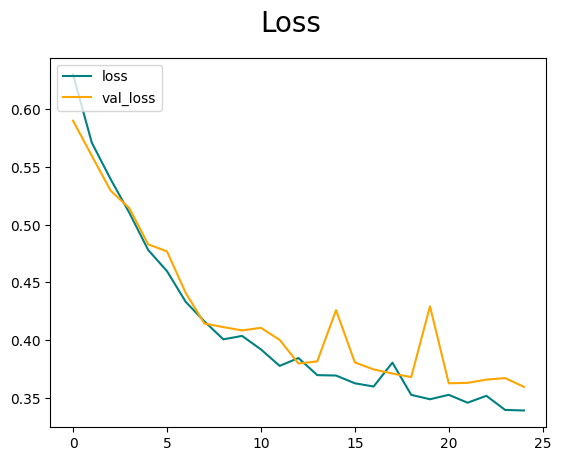

In [387]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle("Loss", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the loss function and validation loss of the model

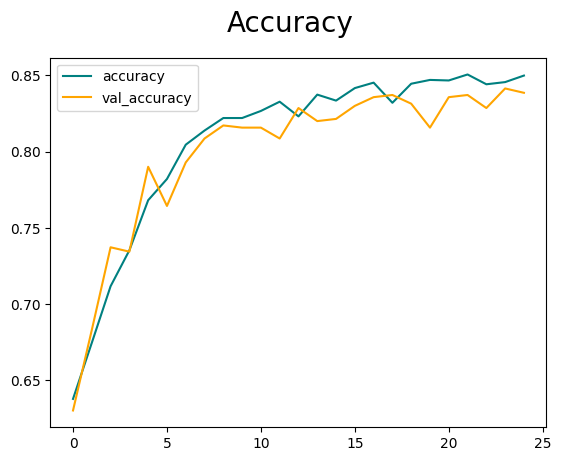

In [388]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig2.suptitle("Accuracy", fontsize = 20)
plt.legend(loc="upper left")
plt.show()

Plotting the accuracy and validation accuracy of the model

In [389]:
model.save(os.path.join('models', 'other.h5'))

/home/eugene/miniconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [390]:
pred = model.predict(newTest)
pred = np.around(pred)

from sklearn.metrics import confusion_matrix

confusion_matrix(newLabelTest, pred)

 1/22 [>.............................] - ETA: 0s

22/22 [==============================] - 0s 2ms/step


array([[291,  66],
       [ 47, 296]])